<a href="https://colab.research.google.com/github/Marrie05/RhombixTechnologies_Tasks/blob/main/A_B_Testing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Define the Hypotheses

Null Hypothesis (H₀):

There is no difference in conversion rates between Version A and Version B.

Alternative Hypothesis (H₁):

Version B has a higher conversion rate than Version A.

Example Dataset (Synthetic Example)

You may replace this with your actual data.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(42)

# Simulated A/B test results
n_A = 2000   # users exposed to version A
n_B = 2100   # users exposed to version B

# conversion rates
conv_A = np.random.binomial(1, 0.12, n_A)   # 12% conversion
conv_B = np.random.binomial(1, 0.15, n_B)   # 15% conversion

df = pd.DataFrame({
    "group": ["A"]*n_A + ["B"]*n_B,
    "converted": np.concatenate([conv_A, conv_B])
})

df.head()

,group,converted
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


Compute Conversion Rates

In [ ]:
rate_A = df[df.group=="A"].converted.mean()
rate_B = df[df.group=="B"].converted.mean()

print("Conversion Rate A:", round(rate_A, 4))
print("Conversion Rate B:", round(rate_B, 4))
print("Lift:", round((rate_B-rate_A)/rate_A*100, 2), "%")

Conversion Rate A: 0.118
Conversion Rate B: 0.1414
Lift: 19.85 %


Perform Statistical Significance Test
Use a two-proportion z-test because conversion is binary.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([df[df.group=="A"].converted.sum(),
                  df[df.group=="B"].converted.sum()])
nobs = np.array([n_A, n_B])

stat, p_value = proportions_ztest(count, nobs, alternative='smaller')
print("Z-statistic:", stat)
print("P-value:", p_value)

Z-statistic: -2.2297040485216733
P-value: 0.012883548470767578


Effect Size (Practical Importance)

Even if statistically significant, is the improvement meaningful?

A real-world product decision should consider both:

Statistical Significance (p-value)

Practical Significance (effect size)

In [ ]:
effect = rate_B - rate_A
print("Absolute Improvement:", round(effect*100, 2), "%")

Absolute Improvement: 2.34 %


Confidence Interval for Difference

Compare intervals → if they don't overlap, difference is very strong.

In [ ]:
import statsmodels.api as sm

cm = sm.stats.proportion_confint(count[1], nobs[1], alpha=0.05, method='normal')
print(f"95% CI for Group B Conversion:", cm)

cm2 = sm.stats.proportion_confint(count[0], nobs[0], alpha=0.05, method='normal')
print(f"95% CI for Group A Conversion:", cm2)

95% CI for Group B Conversion: (0.1265248324108635, 0.15633231044627935)
95% CI for Group A Conversion: (0.10386133549053231, 0.13213866450946768)


Visualization (Optional)

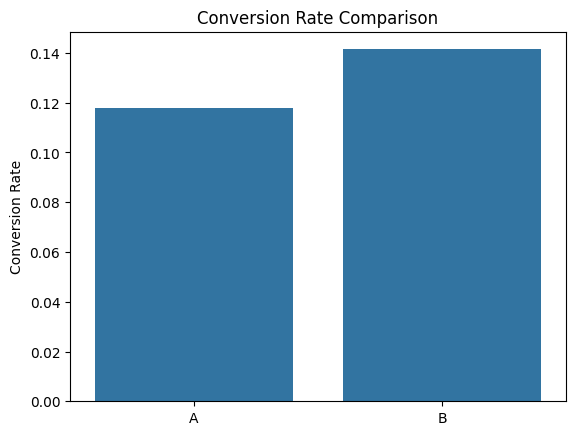

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=['A','B'], y=[rate_A, rate_B])
plt.title("Conversion Rate Comparison")
plt.ylabel("Conversion Rate")
plt.show()